In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

citations:
https://www.geeksforgeeks.org/data-analysis/exploratory-data-analysis-in-python/


In [ ]:
DATA_PATH= "./sentiment140/training.1600000.processed.noemoticon.csv"


load + small transformations for more readable dataset

In [ ]:
#load data
df = pd.read_csv(DATA_PATH, encoding='latin-1', header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']


## Get Basic information

In [ ]:
print(df.shape)

(1600000, 6)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


Below confirms target is within correct range based of kaggle documentation. 


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,1600000.0,2.000000e+00,2.000001e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00
ids,1600000.0,1.998818e+09,1.935761e+08,1.467810e+09,1.956916e+09,2.002102e+09,2.177059e+09,2.329206e+09


In [ ]:
df.nunique()

target          2
ids       1598315
date       774363
flag            1
user       659775
text      1581466
dtype: int64

this dataset is super mid we dont have neutral targets


In [ ]:
print("Unique flags:", df['flag'].unique()``)
print("Unique targets:", df['target'].unique())

Unique flags: ['NO_QUERY']
Unique targets: [0 4]


# Univariate analysis

/tmp/ipykernel_19165/52549862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


<Axes: xlabel='target'>

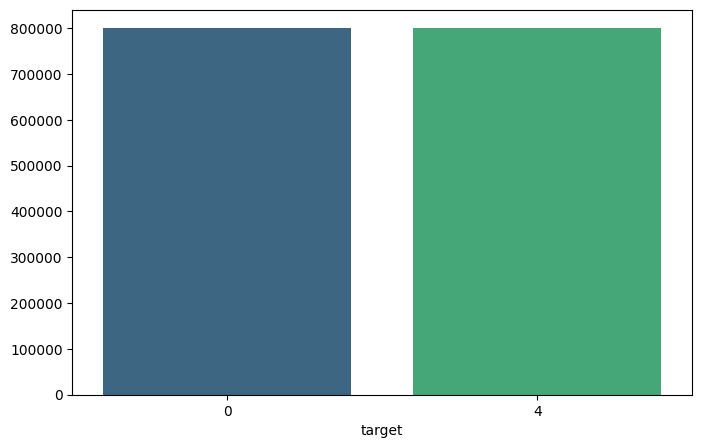

In [ ]:
target_counts = df['target'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')

# changing dataset

remove the useless columns

In [ ]:
df = df.drop(columns=['ids', 'flag', 'user'])